# Cross-matching HSC spec-z with Mizuki photo-z

Zooey Nguyen

2021-07-09

Cross-match on HSC v3 data.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from photoz_metrics import *

In [2]:
matched_df = pd.read_csv('/data/HSC/crossmatched_mizuki.csv')
matched_df = matched_df[(matched_df['specz_redshift'] < 4) & matched_df['specz_redshift'] > 0.01]
matched_df

,# object_id_1,specz_redshift_err,specz_redshift,specz_mag_i,specz_name,specz_ra,specz_dec,ra,dec,coord,...,r_cmodel_magsigma,i_cmodel_magsigma,z_cmodel_magsigma,y_cmodel_magsigma,# object_id_2,photoz_mean,photoz_mode,photoz_median,photoz_best,photoz_mc
0,41205594115308818,0.00032,0.44150,19.657000,DEEP3-201701-11031189,212.144270,-0.534029,212.144301,-0.534024,"(-174639.046875, -109739.125, -1922.4591064453...",...,0.004024,0.001739,0.002446,0.004908,41205594115308818,0.467101,0.48,0.470105,0.47,0.447505
1,42195571192104793,0.00041,0.18440,20.997999,DEEP3-201701-11033360,184.962780,1.054737,184.962770,1.054721,"(-205456.734375, -17840.619140625, 3796.782226...",...,0.002794,0.002308,0.005075,0.012780,42195571192104793,0.001133,0.00,0.000002,0.00,-0.001352
2,40972922851972935,0.00162,2.48628,22.030001,DEEP3-201701-11034334,133.196180,-0.030803,133.196147,-0.030783,"(-141187.84375, 150370.046875, -110.8181381225...",...,0.010228,0.009626,0.017528,0.021740,40972922851972935,1.437447,1.44,1.437973,1.44,1.445994
3,42305363441114101,0.00013,0.39639,21.243000,DEEP3-201701-11046121,222.207150,0.114298,222.207143,0.114306,"(-152784.34375, -138571.09375, 411.5023193359375)",...,0.002716,0.002016,0.003808,0.007008,42305363441114101,0.006814,0.00,0.000018,0.00,0.000423
4,41130810144748624,0.00007,0.00096,21.375000,DEEP3-201701-11047080,187.026080,-1.232438,187.026073,-1.232429,"(-204668.515625, -25224.6796875, -4436.40234375)",...,0.003287,0.002297,0.003526,0.008592,41130810144748624,0.001476,0.00,0.000003,0.00,0.003575
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60705,38544621357264210,0.00101,1.02580,21.892000,VIPERS-PDR1-122098063,33.380806,-4.224503,33.380801,-4.224549,"(171769.796875, 113178.75, -15194.599609375)",...,0.015241,0.009637,0.011535,0.023437,38544621357264210,0.981500,1.00,0.984504,0.98,0.949642
60706,38544483918310909,0.00064,0.27730,21.805000,VIPERS-PDR1-122102271,33.385590,-4.205549,33.385589,-4.205565,"(171764.53125, 113195.8671875, -15126.4443359375)",...,0.004754,0.003915,0.005078,0.008078,38544483918310909,0.477600,0.49,0.480294,0.48,0.468744
60707,38544483918310884,0.00097,0.93520,22.341999,VIPERS-PDR1-122102045,33.393837,-4.206832,33.393841,-4.206844,"(171747.953125, 113220.421875, -15131.03515625)",...,0.014377,0.009674,0.012963,0.029584,38544483918310884,0.830741,0.85,0.836218,0.83,0.893353
60708,38544483918306365,0.00103,1.06020,21.641001,VIPERS-PDR1-122084291,33.440014,-4.287483,33.439994,-4.287491,"(171638.75, 113346.8828125, -15420.5673828125)",...,0.008138,0.006105,0.010679,0.021263,38544483918306365,0.999380,1.01,0.999379,1.00,1.024014


<AxesSubplot:xlabel='specz_redshift', ylabel='photoz_best'>

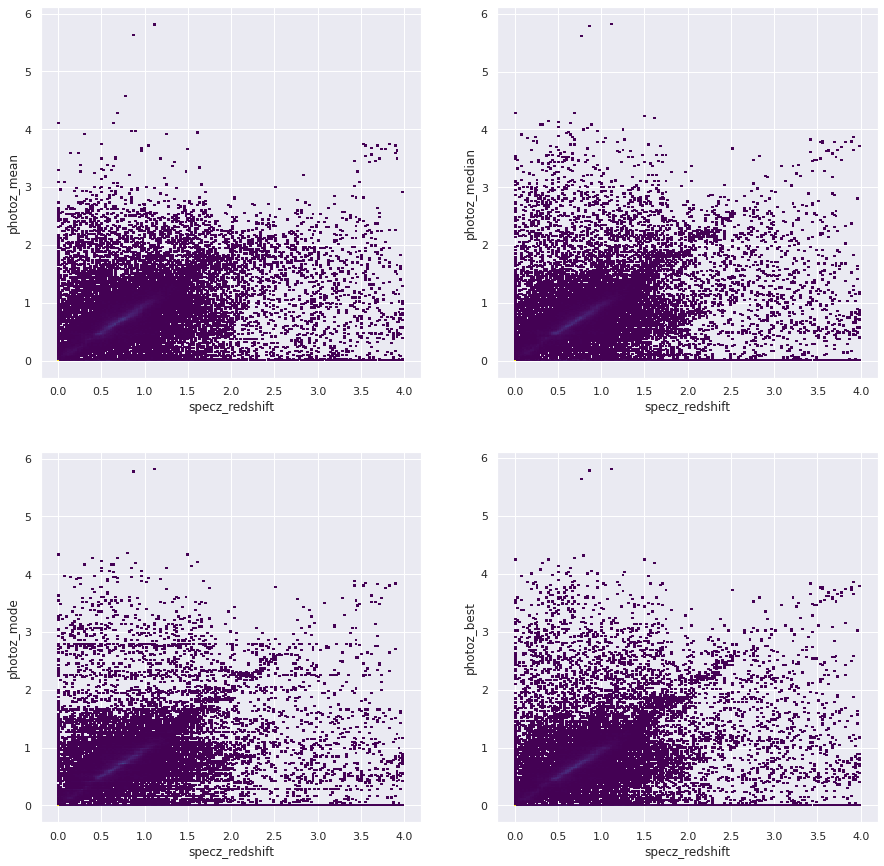

In [3]:
sns.set(rc={'figure.figsize':(15,15)})
fig, axes = plt.subplots(2, 2)
sns.histplot(x=matched_df['specz_redshift'], y=matched_df['photoz_mean'], cmap='viridis', ax=axes[0,0])
sns.histplot(x=matched_df['specz_redshift'], y=matched_df['photoz_median'], cmap='viridis', ax=axes[0,1])
sns.histplot(x=matched_df['specz_redshift'], y=matched_df['photoz_mode'], cmap='viridis', ax=axes[1,0])
sns.histplot(x=matched_df['specz_redshift'], y=matched_df['photoz_best'], cmap='viridis', ax=axes[1,1])

## Photoz_best performance

In [4]:
z_photo = matched_df['photoz_best']
z_spec = matched_df['specz_redshift']

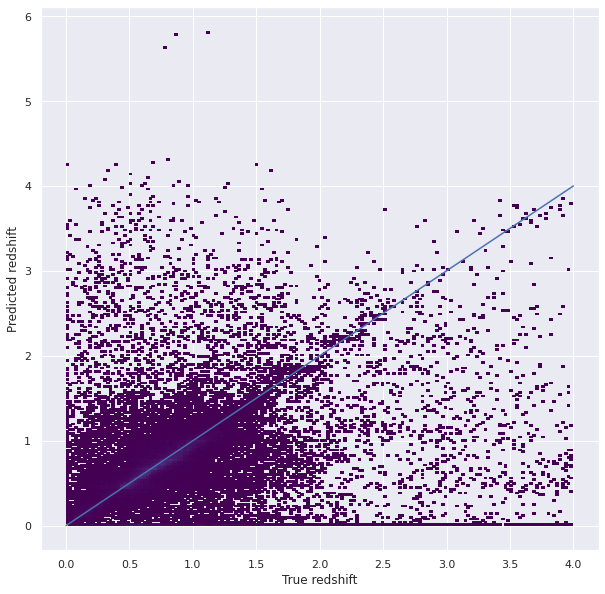

In [5]:
plot_predictions(matched_df['photoz_best'], matched_df['specz_redshift'])

In [6]:
metrics = get_point_metrics(z_spec, z_photo, binned=True)
metrics

,zspec_bin,count,L,bias_bw,bias_conv,scatter_bw,scatter_conv,outlier_bw,outlier_conv
0,"(0.0, 0.2]",2572,0.441524,0.041672,0.062766,0.213162,0.156856,0.329316,0.421851
1,"(0.2, 0.4]",4001,0.350726,0.033159,0.031977,0.150120,0.118608,0.165459,0.332667
2,"(0.4, 0.6]",11157,0.221885,0.011205,0.013974,0.070917,0.055784,0.198261,0.189209
3,"(0.6, 0.8]",15235,0.147257,0.011002,0.012550,0.049198,0.041444,0.156744,0.103249
4,"(0.8, 1.0]",11226,0.169524,0.011931,0.012484,0.057423,0.047763,0.169517,0.125601
5,"(1.0, 1.2]",4102,0.282254,-0.001014,0.002709,0.112677,0.079915,0.178206,0.262555
6,"(1.2, 1.4]",1662,0.419521,-0.083412,-0.059593,0.206169,0.160850,0.083634,0.437425
7,"(1.4, 1.6]",877,0.544134,-0.167600,-0.167977,0.248234,0.253782,0.062714,0.615735
8,"(1.6, 1.8]",541,0.539503,-0.147943,-0.122454,0.274730,0.222576,0.055453,0.582255
9,"(1.8, 2.0]",486,0.500567,-0.127746,-0.093560,0.266982,0.223327,0.030864,0.549383


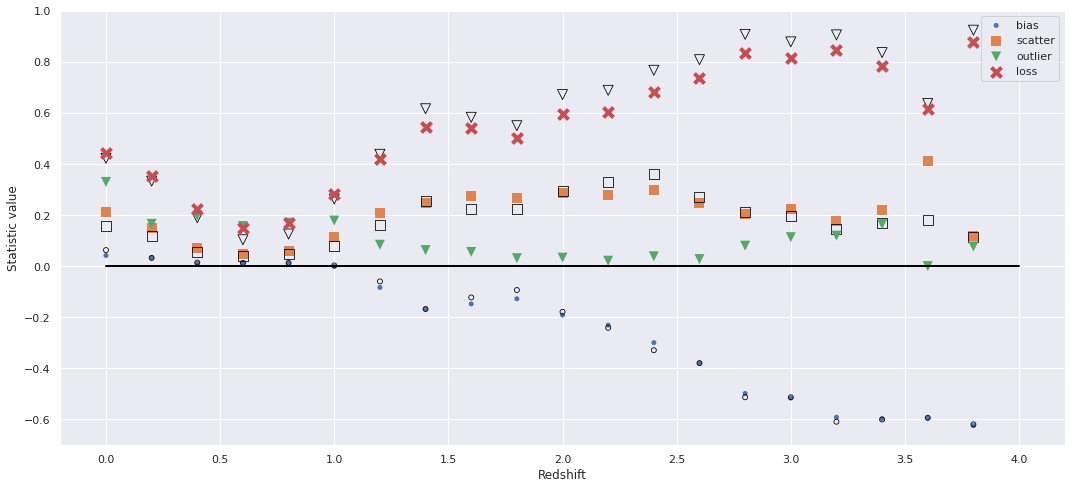

In [7]:
plot_point_metrics(metrics)